## 4. Ejemplo básico
Una compañía produce dos productos ($X_1$ y $X_2$) usando dos máquinas ($A$ y $B$). Cada unidad de **$X_1$ que se produce requiere 50 minutos en la máquina $A$** y 30 minutos en la máquina $B$. Cada unidad de **$X_2$ que se produce requiere 24 minutos en la máquina $A$** y 33 minutos en la máquina $B$.

Al comienzo de la semana hay 30 unidades de $X_1$ y 90 unidades de $X_2$ en inventario. El tiempo de uso disponible de la **máquina $A$ es de 40 horas** y el de la máquina $B$ es de 35 horas.

La demanda para $X_1$ en la semana actual es de 75 unidades y de $X_2$ es de 95 unidades. La política de la compañía es maximizar la suma combinada de unidades de $X_1$ e $X_2$ en inventario al finalizar la semana.

Formular el problema de decidir cuánto hacer de cada producto en la semana como un problema de programación lineal.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

se tienen las desigualdades 
$$50x_1 + 24x_2\leq 2400$$
$$50x_1 + 33x_2\leq 2100$$

para hacer el plot las pasamos a igualdades y despejamos para una variable.

$$50x_1 + 24x_2= 2400$$
$$50x_1 + 33x_2= 2100$$

el despeje queda entonces como

$$x_2 = (2400 - 50 x_1)/24$$
$$x_2 = (2100 - 30 x_1)/33$$

In [3]:
def x2_v1(x1):
    return (2400 - 50*x1)/24  # MAQUINA A
def x2_v2(x1):
    return (2100 - 30*x1)/33  # MAQUINA B

In [12]:
x1 = np.linspace(0, 100)

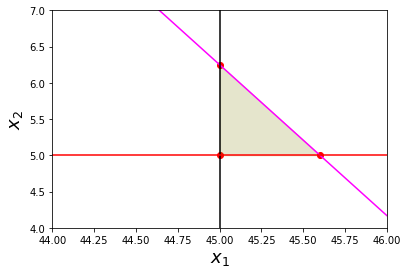

In [50]:
plt.plot(x1, x2_v1(x1), 'magenta') #desigualdad 1
plt.plot(x1, x2_v2(x1)) # desigualdad 2
plt.plot([45, 45], [0, 25], 'k') #LINEA negra
plt.scatter([43, 47], [5, 5], s= 200, color="red") # puntos rojos 
plt.plot([43, 50], [5, 5], 'r')  #LINEA roja
plt.xlim(xmin = 44, xmax = 46) #que tan granda es x(margenes)
plt.ylim(ymin = 4, ymax = 7) #que tan granda es y(margenes)
plt.scatter([45,45,45.6], [6.25,5,5], color = 'red')
plt.fill_between(np.array([45, 45.6]), x2_v1(np.array([45, 45.6])),
               5*np.ones(2), alpha = .2, color = 'olive')
plt.xlabel(r"$x_1$", fontsize= 18)
plt.ylabel(r"$x_2$", fontsize= 18)
plt.show()

In [51]:
import scipy.optimize as opt

In [52]:
#res = opt.linprog(c, A_ub=A, b_ub=b, options={'disp': True})

In [53]:
c = np.array([-1, -1]) # min (-x1 - x2)
A = np.array([[50, 24], [30, 33]])
b = np.array([2400, 2100])
x1_bound = (45, None)
x2_bound = (5, None)

In [55]:
res = opt.linprog(c, A_ub=A, b_ub=b,bounds=(x1_bound, x2_bound), options={'disp': True})

Optimization terminated successfully.
         Current function value: -51.250000  
         Iterations: 4


In [56]:
res

     fun: -51.25
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([  0.  , 543.75,   0.  ,   1.25])
  status: 0
 success: True
       x: array([45.  ,  6.25])

esn invenratio teniamos 90 de $x_2$ y 30 de $x_1$

### PROBLEMA MONICA

In [ ]:
#res